# 데이터 분할

- 머신러닝 모델의 성능을 정확하게 평가하기 위해서는 훈련에 사용하지 않은 테스트 세트를 통해 평가해야함
- 평가를 위한 별도의 데이터를 준비하거나 준비된 데이터 중에 일부를 떼어 테스트 세트로 준비
- 훈련 : 테스트 비율은 70 ~ 80 : 20 ~ 30
    - 반드시 정해져 있는 것은 아니며 연구자의 임의로 조절 가능함
    - 전체 데이터가 아주 크고 모든 데이터 패턴을 잘 담아내기만 한다면 테스트 데이터는 1%만 사용해도 충분할 수 있음

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [34]:
plt.rcParams['axes.unicode_minus'] = False

In [2]:
df = pd.read_csv("./data/Fish.csv")

In [3]:
df

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [4]:
df = df.loc[df["Species"].isin(["Bream", "Smelt"]), ["Species", "Weight", "Length2"]]

In [5]:
le = LabelEncoder()
df["label"] = le.fit_transform(df["Species"])

In [6]:
df.head()

,Species,Weight,Length2,label
0,Bream,242.0,25.4,0
1,Bream,290.0,26.3,0
2,Bream,340.0,26.5,0
3,Bream,363.0,29.0,0
4,Bream,430.0,29.0,0


In [7]:
df.shape

(49, 4)

## 샘플링 편향(sampling bias)

- 훈련 세트에 도미 데이터와 빙어 데이터가 골고루 들어가 있지 않다면 올바르게 분류할 수 없음
    - 예) 빙어 없이 모델 훈련이 이루어진다면 어떤 데이터를 빙어로 분류해야할 지 알 수 없음

- 데이터가 골고루 섞여있지 않으면 샘플링이 한쪽으로 치우쳤다는 의미로 샘플링 편향이라고 부름

## train_test_split()

- 전달되는 리스트라 배열을 섞은 후 비율에 맞게 훈련 세트와 테스트 세트로 나누어 주는 함수
- 매개변수
    - 첫 번째 매개변수 : 피처 데이터 세트
    - 두 번째 매개변수 : 레이블 데이터 세트
    - test_size
        - 전체 데이터에서 테스트 데이터 세트 크기를 얼마로 샘플링 할 것인가를 결정
        - 초기값은 0.25
    - train_size
        - 전체 데이터에서 학습용 데이터 세트 크기를 얼마로 샘플링 할 것인가를 결정
        - 일반적으로는 test_size를 활용
    - shuffle
        - 데이터를 분리하기 전에 데이터를 미리 섞을지를 결정
        - 초기값은 True
        - 데이터를 분산시켜서 좀 더 효율적인 학습 및 테스트 데이터 세트를 만드는 데 사용
    - random_state
        - 매번 코드를 실행할 때마다 다른 결과가 나온다면 정확하게 모델을 평가할 수 없고 모델 최적화에 어려움이 있음
        - 난수를 생성할 때 특정한 규칙으로 생성해서 매번 같은 결과가 나오게 통제할 수 있음
    - stratify
        - 무작위로 데이터를 섞으면 샘플링 편향이 일어날 수 있기 때문에 기존 데이터의 비율과 같은 비율로 데이터를 나눌 수 있도록 할 수 있음
        
- 반환값
    - 튜플 형태
    - 학습용 데이터의 피처 데이터 세트, 테스트용 데이터의 피처 데이터 세트, 학습용 데이터의 레이블 데이터 세트, 테스트용 데이터의 레이블 데이터 세트가 순서대로 반환

In [8]:
x_train, x_test, y_train, y_test = train_test_split(df[["Length2", "Weight"]], df[["label"]], test_size = 0.25, stratify = df[["label"]], random_state = 1)

In [9]:
print(len(x_train), len(x_test), len(y_train), len(y_test))

36 13 36 13


In [10]:
y_test

,label
146,1
157,1
11,0
8,0
5,0
154,1
16,0
145,1
0,0
1,0


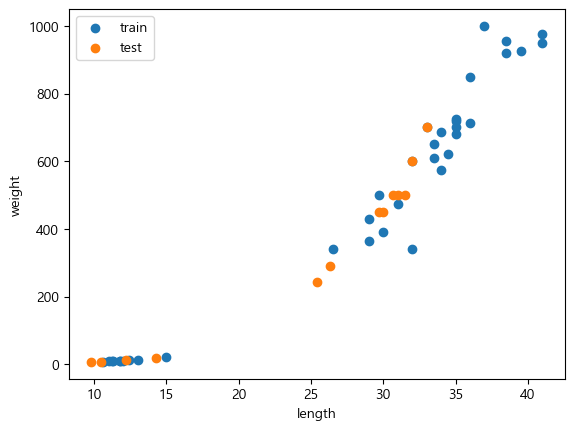

In [11]:
plt.figure()

plt.scatter(x_train["Length2"], x_train["Weight"], label = "train")
plt.scatter(x_test["Length2"], x_test["Weight"], label = "test")

plt.legend()
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

# 모델 훈련

In [12]:
kn = KNeighborsClassifier(n_neighbors = 5)

In [13]:
kn.fit(x_train, y_train)

C:\Users\polar\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

# 모델 평가

In [14]:
kn.score(x_test, y_test)

1.0

# 모델 최적화

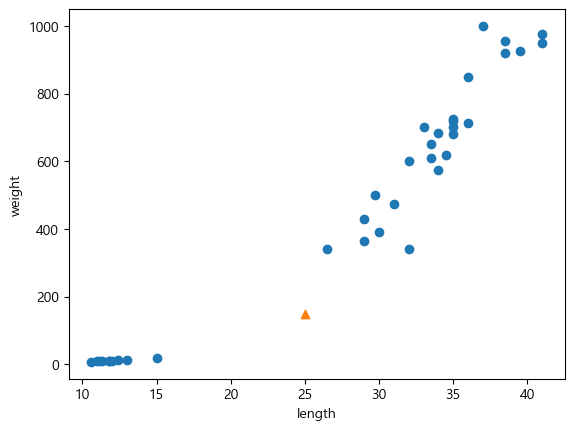

In [16]:
plt.figure()

plt.scatter(x_train.iloc[:, 0], x_train.iloc[:, 1])
plt.scatter(25, 150, marker = "^")
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

In [17]:
kn.predict([[25, 150]])

C:\Users\polar\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([1])

- kneighbors()
    - 이웃까지의 거리와 이웃 샘플의 인덱스를 반환

In [19]:
dist, idx = kn.kneighbors([[25, 150]])

C:\Users\polar\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [20]:
dist

array([[130.48375378, 137.17988191, 138.32150953, 140.62090883,
        140.72046759]])

In [21]:
idx

array([[ 9,  1,  4, 26,  6]], dtype=int64)

In [23]:
idx.flatten()

array([ 9,  1,  4, 26,  6], dtype=int64)

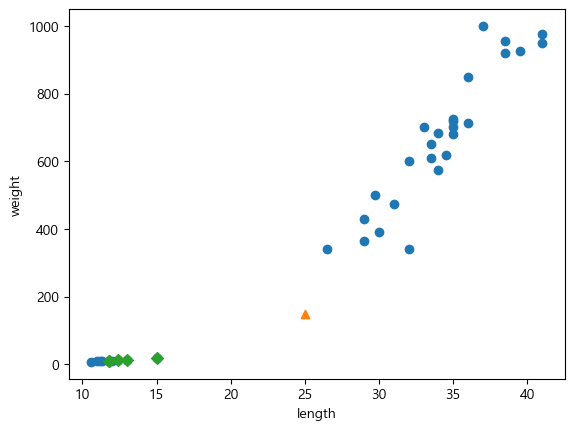

In [22]:
plt.figure()

plt.scatter(x_train.iloc[:, 0], x_train.iloc[:, 1])
plt.scatter(25, 150, marker = "^")

plt.scatter(x_train.iloc[idx.flatten(), 0], x_train.iloc[idx.flatten(), 1], marker = "D")

plt.xlabel("length")
plt.ylabel("weight")
plt.show()

In [24]:
y_train.iloc[idx.flatten()]

,label
158,1
155,1
156,1
151,1
152,1


- x축은 범위가 좁고 y축은 범위가 넓기 때문에 y축으로 조금만 차이가 벌어져도 큰 값으로 거리가 계산됨

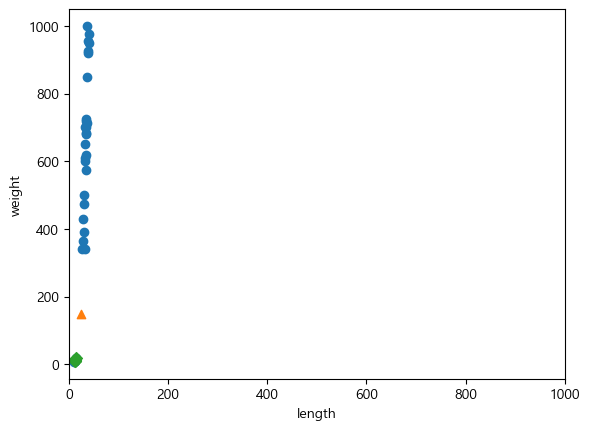

In [26]:
# x, y축을 동일 범위로 시각화
plt.figure()

plt.scatter(x_train.iloc[:, 0], x_train.iloc[:, 1])
plt.scatter(25, 150, marker = "^")

plt.scatter(x_train.iloc[idx.flatten(), 0], x_train.iloc[idx.flatten(), 1], marker = "D")

plt.xlim(0, 1000)

plt.xlabel("length")
plt.ylabel("weight")
plt.show()

- 시각화 자료를 참고하면 현재 데이터에서 생선의 길이는 모델이 값을 예측하는 데에 거의 사용되지 않고 있음
    - 두 독립변수의 단위가 다르기 때문에
- knn은 특히 데이터 간 거리가 모델 성능에 영향을 많이 주는 특성이 있음
    - 각 독립변수의 단위가 다르면 올바른 예측이 어려울 가능성이 높음
- 각 독립변수의 단위를 일정한 기준으로 맞춰 주는 작업을 스케일링(scaling)이라고 함

## 스케일링

- 스탠다드 스케일링(standard scaling)
    - 각 피처값이 0에서 표준편차의 몇 배만큼 떨어져있는지를 나타내 데이터의 단위와 관계없이 동일한 조건으로 비교할 수 있게 변환
        - 분산 : 데이터에서 평균을 뺀 값을 모두 제곱한 다음 평균을 계산
        - 표준편차 : 분산의 제곱근. 데이터가 분산된 정도
    - 평균이 0이고 분산이 1인 가우시안 정규 분포를 가진 값으로 변환
        - 몇몇 알고리즘에서는 데이터가 가우시안 정규 분포를 가지고 있다고 가정하고 구현하기 때문에 스탠다드 스케일링이 예측 성능 향상에 중요한 요소가 될 수 있음
            -  예) 서포트 벡터 머신, 선형 회귀, 로지스틱 회귀
    - 계산식
        - (특성값 - 평균) / 표준편차
        
- MinMaxScaler
    - 데이터값을 0과 1 사이의 범위 값으로 변환
        - 음수 값이 있으면 -1에서 1 사이의 값으로 변환
       
- 학습데이터와 테스트데이터의 스케일링 변환시 유의점
    - scaler 객체를 이용해 데이터 스케일링 변환시 사용 메서드
        - fit()
            - 데이터 변환을 위한 기준 정보 설정
            - 예) 데이터 세트의 최댓값 / 최솟값 파악 등
            
        - transform()
            - fit()으로 설정된 정보를 이용해 데이터를 변환
            
        - fit_transform()
            - fit()과 transform()을 한 번에 적용
            
    - **학습 데이터로 fit()이 적용된 스케일링 기준 정보를 그대로 테스트 데이터에 적용해야함**
        - 테스트 데이터로 다시 새로운 스케일링 기준 정보를 만들게 되면 학습 데이터와 테스트 데이터의 스케일링 기준 정보가 서로 달라지기 때문에 올바른 예측 결과를 도출하지 못함

In [27]:
ss = StandardScaler()

In [28]:
scaled_x_train = ss.fit_transform(x_train)

In [29]:
x_train

,Length2,Weight
34,41.0,950.0
155,12.4,13.4
19,33.5,650.0
149,11.2,9.8
156,13.0,12.2
28,36.0,850.0
152,11.8,9.9
13,32.0,340.0
148,11.0,9.7
158,15.0,19.9


In [30]:
scaled_x_train

array([[ 1.24255112,  1.35916345],
       [-1.49867586, -1.3854064 ],
       [ 0.52369789,  0.48005716],
       [-1.61369238, -1.39595568],
       [-1.4411676 , -1.38892283],
       [ 0.76331563,  1.06612802],
       [-1.55618412, -1.39566264],
       [ 0.37992724, -0.42835268],
       [-1.6328618 , -1.39624871],
       [-1.24947341, -1.3663591 ],
       [ 0.66746854,  0.68518196],
       [-1.60410767, -1.39917907],
       [ 0.47577434,  0.62657487],
       [ 0.66746854,  0.56796779],
       [ 0.76331563,  0.66759983],
       [ 0.09238595, -0.36095453],
       [ 0.15947892,  0.04050401],
       [-1.67120064, -1.40416067],
       [ 0.37992724,  0.33353944],
       [ 0.66746854,  0.69983373],
       [ 0.57162144,  0.58261956],
       [ 1.09878047,  1.28590459],
       [ 1.00293338,  1.27125282],
       [-0.14723179, -0.42835268],
       [ 0.28408015, -0.03275485],
       [ 0.57162144,  0.26028058],
       [-1.55618412, -1.39536961],
       [ 0.09238595, -0.16462079],
       [ 0.66746854,

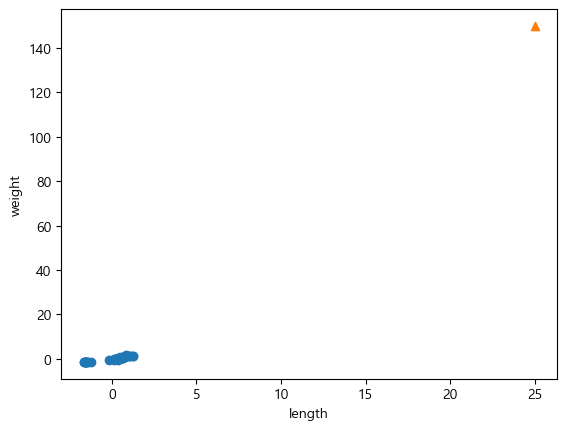

In [31]:
# 스케일링된 데이터 시각화
plt.figure()

plt.scatter(scaled_x_train[:, 0], scaled_x_train[:, 1])
plt.scatter(25, 150, marker = "^")

plt.xlabel("length")
plt.ylabel("weight")
plt.show()

- 값의 스케일이 달라졌기 때문에 테스트 데이터도 스케일링을 해줘야 함

In [32]:
scaled_data = ss.transform([[25, 150]])
scaled_data

C:\Users\polar\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[-0.29100244, -0.98512   ]])

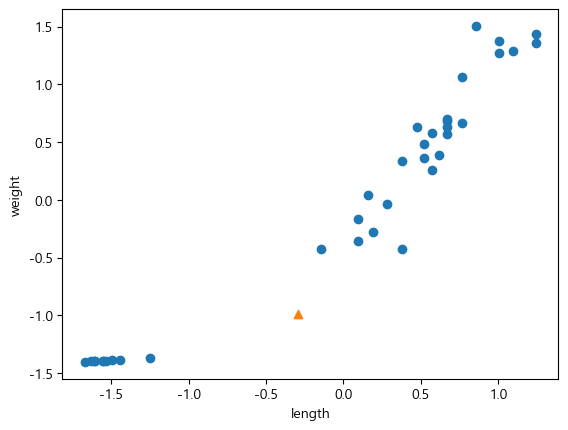

In [35]:
plt.figure()

plt.scatter(scaled_x_train[:, 0], scaled_x_train[:, 1])
plt.scatter(scaled_data[0,0], scaled_data[0,1], marker = "^")

plt.xlabel("length")
plt.ylabel("weight")
plt.show()

In [36]:
scaled_x_test = ss.transform(x_test)

In [37]:
# 스케일링된 데이터로 다시 모델 훈련
kn = KNeighborsClassifier(n_neighbors = 5)

In [38]:
kn.fit(scaled_x_train, y_train)

C:\Users\polar\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [39]:
kn.score(scaled_x_test, y_test)

1.0

In [40]:
# 문제의 데이터 예측
kn.predict(scaled_data)

array([0])

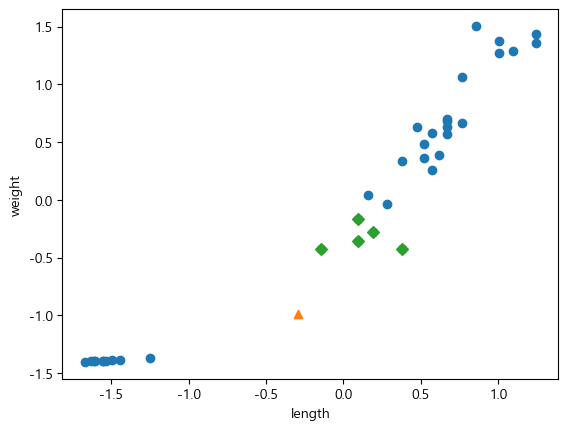

In [41]:
# 시각화
dist, idx = kn.kneighbors(scaled_data)

plt.figure()

plt.scatter(scaled_x_train[:, 0], scaled_x_train[:, 1])
plt.scatter(scaled_data[0, 0], scaled_data[0, 1], marker="^")
plt.scatter(scaled_x_train[idx.flatten(), 0], scaled_x_train[idx.flatten(), 1], marker  = "D")

plt.xlabel("length")
plt.ylabel("weight")
plt.show()